<a href="https://colab.research.google.com/github/felgarti/deepLearning/blob/main/CP_Happy_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# If you happy and I know it you can enter my House 

You'll see how you can in a couple of hours build a deep learning algorithm.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import *
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [ ]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    print(train_y)
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")
Y_train_orig.T

[0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0
 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1
 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1
 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0
 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1
 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0
 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0
 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 0 1 0 0 1 0 0 0 1 

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

This dataset can be used to solve the Happy House problem.
Where, we allow a person to enter the house only if he/she is smiling!
So, a smile detector!


![Texte alternatif…](https://raw.githubusercontent.com/Kulbear/deep-learning-coursera/master/Convolutional%20Neural%20Networks/images/house-members.png)



Details of the "Happy" dataset:

* Images are of shape (64,64,3)
* Training: 600 pictures
* Test: 150 pictures


# Load Dataset

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

[0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0
 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1
 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1
 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0
 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1
 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0
 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0
 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0
 1 0 0 0 1 0 0 1 0 0 0 1 

Image shape : (64, 64, 3)


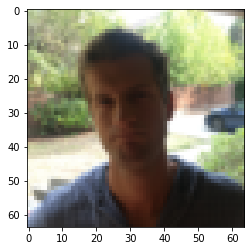

In [ ]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model

_________________________________________________________________

conv2d_3 (Conv2D)            (None, 64, 64, 32)        4736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 32769     
_________________________________________________________________



In [ ]:
model = Sequential([
        Input(shape=(64,64,3)),
        Conv2D(filters = 32,kernel_size=(3,3),padding='same'),
        BatchNormalization(),
        MaxPooling2D(),
        Flatten(),
        Dense(1,activation="sigmoid")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1)                 32769     
                                                                 
Total params: 33,793
Trainable params: 33,729
Non-traina

In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
history_model = model.fit(X_train,Y_train,batch_size=56,epochs=20,validation_split=0.2)

Epoch 1/20
9/9 [==============================] - 3s 243ms/step - loss: 3.2607 - accuracy: 0.5333 - val_loss: 0.8538 - val_accuracy: 0.5500
Epoch 2/20
9/9 [==============================] - 2s 214ms/step - loss: 0.9784 - accuracy: 0.7750 - val_loss: 0.5448 - val_accuracy: 0.6750
Epoch 3/20
9/9 [==============================] - 2s 212ms/step - loss: 0.4470 - accuracy: 0.8604 - val_loss: 0.4816 - val_accuracy: 0.7500
Epoch 4/20
9/9 [==============================] - 2s 216ms/step - loss: 0.1979 - accuracy: 0.9125 - val_loss: 0.5448 - val_accuracy: 0.6250
Epoch 5/20
9/9 [==============================] - 2s 213ms/step - loss: 0.1169 - accuracy: 0.9583 - val_loss: 0.4385 - val_accuracy: 0.7833
Epoch 6/20
9/9 [==============================] - 2s 213ms/step - loss: 0.0804 - accuracy: 0.9708 - val_loss: 0.4020 - val_accuracy: 0.8667
Epoch 7/20
9/9 [==============================] - 2s 210ms/step - loss: 0.0593 - accuracy: 0.9771 - val_loss: 0.4143 - val_accuracy: 0.8167
Epoch 8/20
9/9 [====

# Evaluate / Test

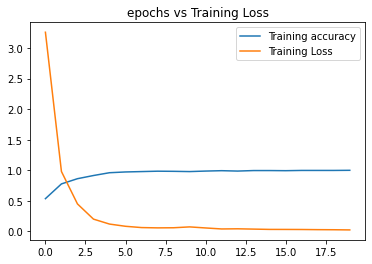

In [ ]:
train_accuracy = history_model.history["accuracy"]
train_loss = history_model.history["loss"]

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

Evaluate Test set

In [ ]:
performance = model.evaluate(X_test,Y_test)
print("accuracy is ",performance[1])

5/5 [==============================] - 0s 32ms/step - loss: 0.3298 - accuracy: 0.8800
accuracy is  0.8799999952316284


Confusion Matrix

In [ ]:
Y_pred = model.predict(X_test)
for i in range(Y_pred.shape[0]):
  if Y_pred[i]>0.42 : 
    Y_pred[i]=1
  else :
    Y_pred[i]=0



In [ ]:
confusion_matrix(Y_pred,Y_test)

array([[61,  9],
       [ 5, 75]])

# Note

Before you submit your work 

* You should compare different optimizers

---

* Display images with Predicted & expected labels (Happy-sad)
